<a href="https://colab.research.google.com/github/hmarathe420/Book_Recommendation_System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Book Recommendation System



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name**            - Harshal Marathe      


# **Project Summary -**

As a Data Scientist Trainee at Almabetter, I developed a sophisticated Book Recommendation System to enhance the reading experience for users by providing personalized book suggestions based on their preferences and reading history. This project aimed to tackle the challenge of information overload and guide users towards discovering books that align with their interests.


**What I Did:**

* Collecting and Cleaning Data: I gathered information about many different books, like their genres, authors, and how much people liked them. I made sure the data was accurate and ready to use.

* Finding Similar Readers: I figured out who likes similar kinds of books. If you enjoy books similar to someone else, you'll get recommendations they liked.

* Matching Book Traits: I looked at what makes a book special, like its genre and who wrote it. This helped me suggest books that match what you already enjoy.

* Smart Math Stuff: I used some smart math tricks to understand patterns in the data. This made the recommendations even more accurate.

* Trying Different Ideas: I tested different ideas to make sure the suggestions were as good as possible. This included trying out different ways of predicting what books you might like.

**How It Works:**

* You tell the system about some books you like.
* The system uses its math tricks to find books similar to the ones you like.
* It also looks at the traits of the books to find others that you might enjoy.
* Finally, it suggests these books to you so you can have more great reading experiences.

**What's Next:**
This project is just the beginning. In the future, we could make the system even smarter by understanding book content better or getting feedback from users like you. We might also make it easier to use by creating a simple website where you can get recommendations with just a few clicks.

I'm excited to share this project with you, and I'm looking forward to seeing how it can help people discover fantastic books they might have missed otherwise.

# **GitHub Link -**

**GitHub Link -->**   [Click Here](https://github.com/hmarathe420/Book_Recommendation_System)

# **Problem Statement**


**During the last few decades, with the rise of Youtube, Amazon, Netflix, and
many other such web services, recommender systems have taken more and
more place in our lives. From e-commerce (suggest to buyers articles that
could interest them) to online advertisement (suggest to users the right
contents, matching their preferences), recommender systems are today
unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at
suggesting relevant.
items to users (items being movies to watch, text to read, products to buy, or
anything else depending on industries). Recommender systems are really
critical in some industries as they can generate a huge amount of income
when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system
for users.**

# **Let's Begin !**

## **1. Know Your Data**

### Import Libraries

In [209]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN





### Dataset Loading

In [105]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
# Loading book, user and rating dataset from the drive
book_df = pd.read_csv("/content/drive/MyDrive/Book Recommendation  System/Books.csv")
user_df = pd.read_csv("/content/drive/MyDrive/Book Recommendation  System/Users.csv")
rating_df = pd.read_csv("/content/drive/MyDrive/Book Recommendation  System/Ratings.csv")

### Dataset First View

In [107]:
# book_df first look
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [108]:
# User_df first look
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [109]:
# rating_df first look
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [110]:
# printin the shape of our datasets
print(user_df.shape)
print(rating_df.shape)
print(book_df.shape)

(278858, 3)
(1149780, 3)
(271360, 8)


**From the above we get to know that the user_df and rating_df has common column which is user_id. Similarly in rating_df and book_df also has common column which is ISBN so based on user_id column we can join user_df and rating_df and make single dataset called user_rating_df and based on ISBN column we can inner join user_rating_df and book_df and make single df containing three dataset called as full_Df.**

In [111]:
# Here's how we can perform the join operations on our dataset:

# Merge user_df and rating_df on 'User ID'
user_rating_df = pd.merge(user_df, rating_df, on='User-ID', how='inner')

# Merge user_rating_df with book_df on 'ISBN'
full_df = pd.merge(book_df,user_rating_df,on='ISBN', how='inner')

### Dataset Rows & Columns count

In [112]:
# Dataset Rows & Columns count
print(full_df.shape)

(1031136, 12)




*   After inner join our full_df has 1031136 rows and 12 columns.




### Dataset Information

In [113]:
# Dataset Info
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031136 non-null  object 
 1   Book-Title           1031136 non-null  object 
 2   Book-Author          1031135 non-null  object 
 3   Year-Of-Publication  1031136 non-null  object 
 4   Publisher            1031134 non-null  object 
 5   Image-URL-S          1031136 non-null  object 
 6   Image-URL-M          1031136 non-null  object 
 7   Image-URL-L          1031132 non-null  object 
 8   User-ID              1031136 non-null  int64  
 9   Location             1031136 non-null  object 
 10  Age                  753301 non-null   float64
 11  Book-Rating          1031136 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 102.3+ MB


#### Duplicate Values

In [114]:
# Dataset Duplicate Value Count
full_df.duplicated().sum()

0

#### Missing Values/Null Values

In [115]:
# Missing Values/Null Values Count
full_df.isnull().sum()

ISBN                        0
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
User-ID                     0
Location                    0
Age                    277835
Book-Rating                 0
dtype: int64

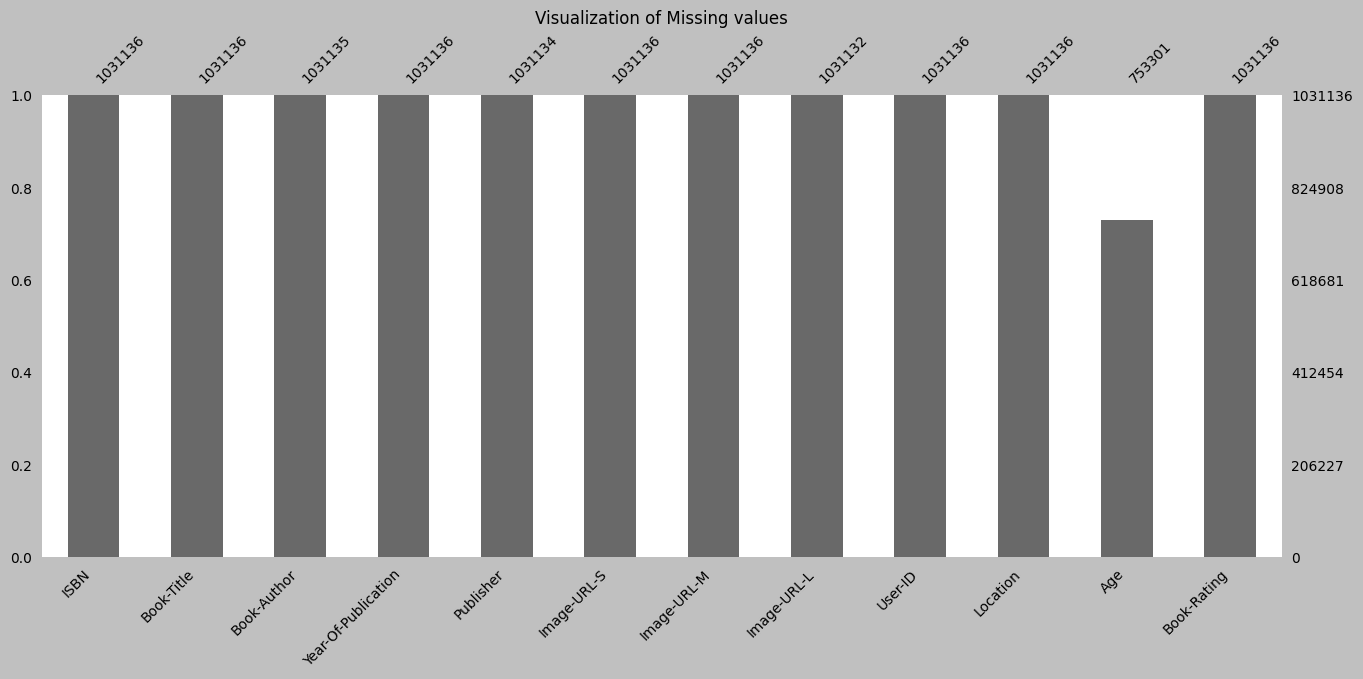

In [116]:
# Visualizing the missing values
plt.figure(facecolor = 'silver')
msno.bar(full_df, color ='dimgray', figsize= (16,6), fontsize= 10)
plt.title("Visualization of Missing values")
plt.plot()
plt.show()

### What did you know about your dataset?

From the above analysis i got to know the following terms of the dataset.

*   Dataset contains 1031136 rows and 12 columns.
*   In this dataset there is no duplicate records present.
*   In age column there is total 277835 missing values present.





## ***2. Understanding Your Variables***

In [117]:
# Dataset Columns
columns = list(full_df.columns)
columns

['ISBN',
 'Book-Title',
 'Book-Author',
 'Year-Of-Publication',
 'Publisher',
 'Image-URL-S',
 'Image-URL-M',
 'Image-URL-L',
 'User-ID',
 'Location',
 'Age',
 'Book-Rating']

In [118]:
# Dataset Describe
full_df.describe()

,User-ID,Age,Book-Rating
count,1.031136e+06,753301.000000,1.031136e+06
mean,1.405945e+05,37.397648,2.839051e+00
std,8.052466e+04,14.098254,3.854157e+00
min,2.000000e+00,0.000000,0.000000e+00
25%,7.041500e+04,28.000000,0.000000e+00
50%,1.412100e+05,35.000000,0.000000e+00
75%,2.114260e+05,45.000000,7.000000e+00
max,2.788540e+05,244.000000,1.000000e+01


### Variables Description

*  **Users**

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL-values.


*  **Books**

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site.

*   **Ratings**

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

### Check Unique Values for each variable.

In [119]:
# Check Unique Values for each variables
full_df.nunique()

ISBN                   270151
Book-Title             241071
Book-Author            101588
Year-Of-Publication       202
Publisher               16729
Image-URL-S            269842
Image-URL-M            269842
Image-URL-L            269839
User-ID                 92106
Location                22480
Age                       141
Book-Rating                11
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [120]:
# Write your code to make your dataset analysis ready.
full_df.rename(columns={'Book-Title': 'Book_Title','Book-Author':'Book_Author', 'Year-Of-Publication':'Year_Of_Publication','User-ID':'User_ID','Book-Rating':'Book_Rating','ISBN':'Book_ID'}, inplace = True)

In [121]:
# dataset without containing image links
df = full_df.drop(columns = ['Image-URL-S','Image-URL-M','Image-URL-L','Location'])

In [122]:
# replacing int(0) in year_of_publication column
df['Year_Of_Publication'] = df['Year_Of_Publication'].replace('DK Publishing Inc', int(0))
df['Year_Of_Publication'] = df['Year_Of_Publication'].replace('Gallimard', int(0))

In [123]:
# changing datatype into int
df['Year_Of_Publication'] = df['Year_Of_Publication'].astype(int)

In [124]:
# Replacing NAN or missing values with the mean value of age column
df['Age'] = df['Age'].replace(np.nan,int(0))

In [125]:
# changing datatype into int
df['Age'] = df['Age'].astype(int)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   Book_ID              1031136 non-null  object
 1   Book_Title           1031136 non-null  object
 2   Book_Author          1031135 non-null  object
 3   Year_Of_Publication  1031136 non-null  int64 
 4   Publisher            1031134 non-null  object
 5   User_ID              1031136 non-null  int64 
 6   Age                  1031136 non-null  int64 
 7   Book_Rating          1031136 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 70.8+ MB


In [127]:
# getting country from the location column
countries = []
cond = full_df['Location'].str.split(',')

for cont in cond:

    countries.append(cont[-1])

In [128]:
# adding country column in dataset
df['Country'] = countries

In [129]:
# replacing invalid string with nan
df['Country'] = df['Country'].replace(' n/a', np.nan)

In [130]:
df['Country'].isnull().sum()

11177

In [131]:
# checking whether country column add in our dataset or not
df.head()

,Book_ID,Book_Title,Book_Author,Year_Of_Publication,Publisher,User_ID,Age,Book_Rating,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,18,0,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,0,5,canada
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,49,0,canada
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,0,8,NaN
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,0,0,canada


### What all manipulations have you done and insights you found?

In the Data Wrangling i have changed some of the column names according to my convenience and dropped some columns from the dataset which are not required right now like images and location. also remove some unrelevant values from the year_of_publication column. and after that change the datatype of variables. we also need to remove outliers and handling missing values in this dataset we will do this steps in data pre-processing. but for now i have changed null or missing values with int(0). In the data wrangling we collect the country names from the location column and add new column as country into dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart 1  -  Rating  Distribution

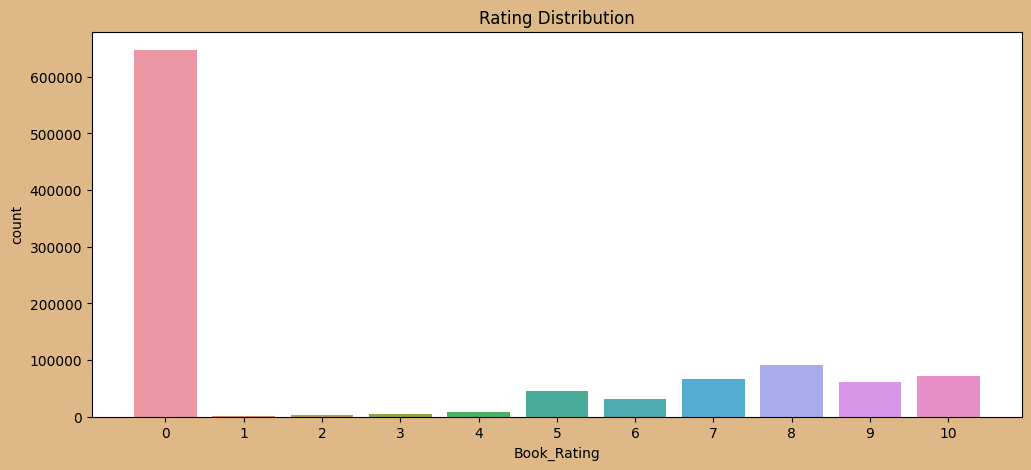

In [132]:
# ploting countplot for distribution of Rating
plt.figure(figsize =(12,5), facecolor = 'burlywood')
sns.countplot(data = df , x = 'Book_Rating')
plt.title('Rating Distribution')
plt.plot()
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to see the distribution of Rating Column that's why i pick the coutplot chart for Visualization.

##### 2. What is/are the insight(s) found from the chart?

From the plotted countplot i can say that the count of '0' is high as compare to other rating categories and except '0' the count of rating '8' is higher than others. and rating '1' has very less count as compare to other rating categories. so basically from the plotted countplot we can conclude that there is 0 rating count is higher as compare to other rating categories. it might be lead to the no rating for the book or less rating. so this kind of insights we got from the above plotted graph.

#### Chart 2 - Age Distribution

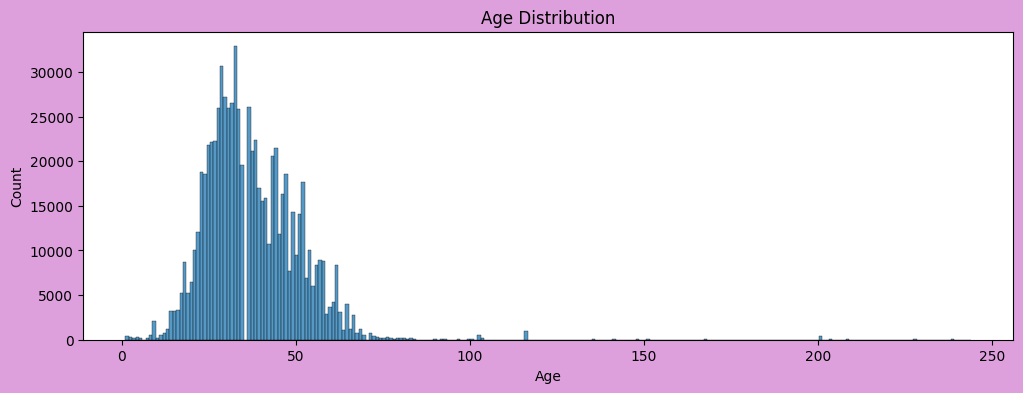

In [133]:
# Age Distribution using displot
age_columns = df[df['Age']!= 0]['Age']
plt.figure(figsize = (12,4), facecolor = 'plum')
sns.histplot(x = age_columns, bins = 250)
plt.title("Age Distribution")
plt.plot()
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to see the age distribution in the form of visualization that's why i use histplot.

##### 2. What is/are the insight(s) found from the chart?

From the above ploted histplot we can say that there are lot of incorrect values present in the age column. because age must be less than 100. but in our dataset most of the values exceds 100. and from the above graph we can say that the age between 10 to 50 has high counts in our dataset. when we will do the data processing and feature enginnering we will remove age column because it does not contain accurate values and most of the values are null in the age column.

#### Chart 3 - Top 10 Popular Books

In [134]:
# Calculating the top 10 highest rating books
top_10 = pd.DataFrame(df.groupby('Book_Title')['Book_Rating'].sum()).sort_values('Book_Rating', ascending = False).head(10)

In [135]:
top_10.reset_index(inplace = True)

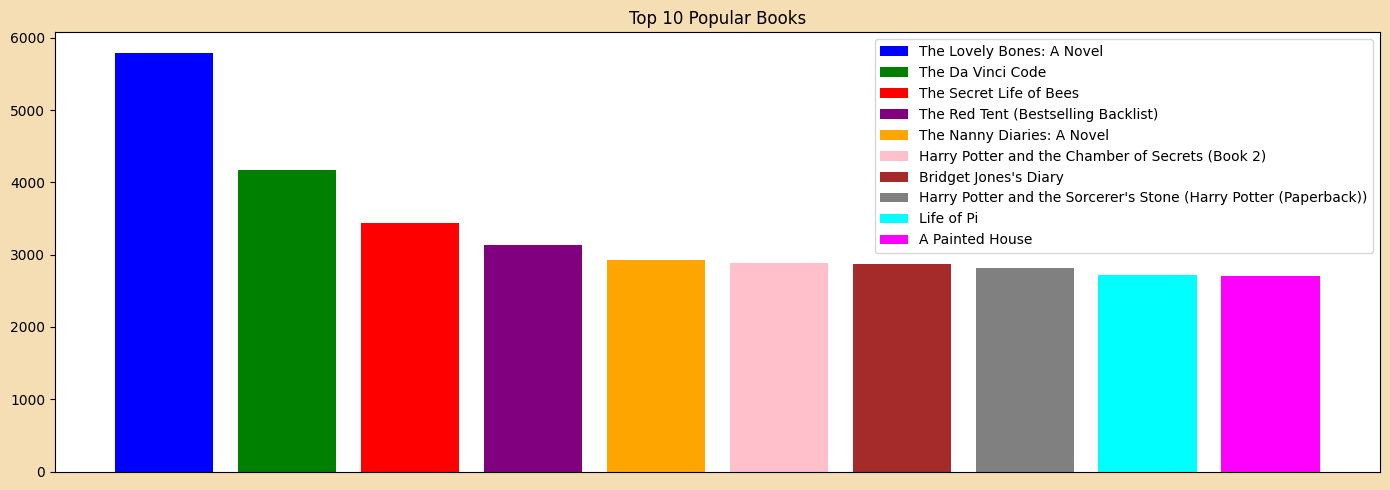

In [136]:
# top 10 Books that has higher rating
plt.figure(figsize =(14,5), facecolor = 'wheat')
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta']
plt.bar(top_10['Book_Title'], top_10['Book_Rating'], label = top_10['Book_Title'], color = colors)
plt.xticks([])
plt.title('Top 10 Popular Books')
plt.tight_layout()
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to see the popular books (Top 10 boos) which having highest rating that's why i use this specific barchart.

##### 2. What is/are the insight(s) found from the chart?

 From the above ploted bargraph i found which top 10 books has highest rating.
 the foloowing books has highest rating.
 * The Lovely Bones: A Novel
 * The Da Vinci Code
 * The Secret Life of Bees
 * The Red Tent (Bestselling Backlist)
 * The Nanny Diaries: A Novel
 * Harry Potter and the Chamber of Secrets (Book 2)
 * Bridget Jones's Diary
 * Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
 * Life of Pi
 * A Painted House



#### Chart 4 - Top 10 Authors

In [137]:
# calculating top authors for visualization
top_authors = pd.DataFrame(df.groupby('Book_Author')['Book_Rating'].sum()).sort_values('Book_Rating', ascending = False).head(10)
top_authors.reset_index(inplace = True)

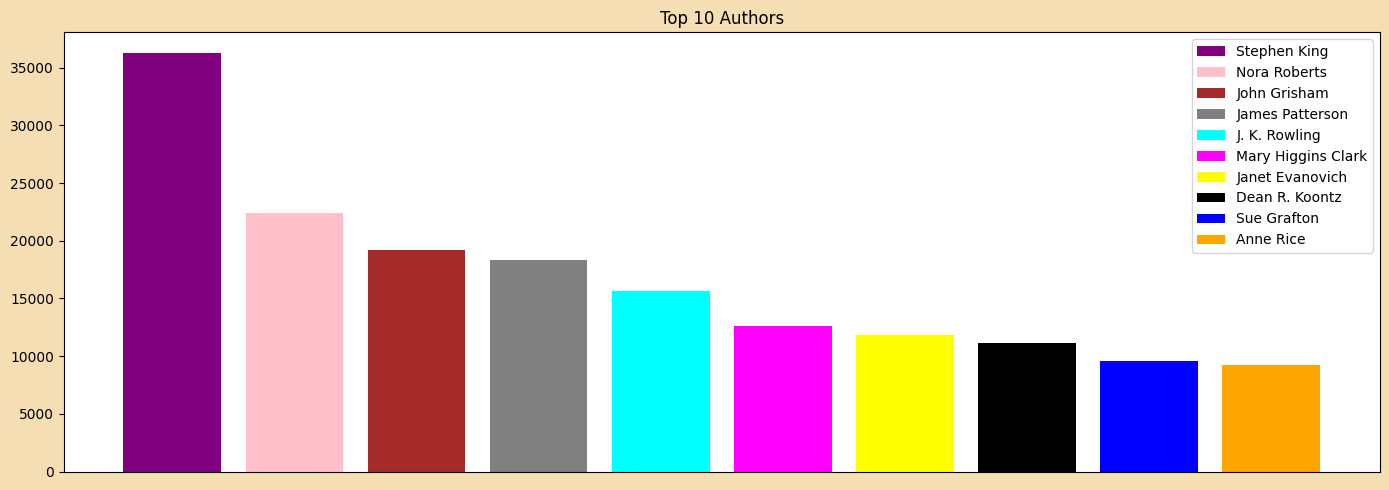

In [138]:
# ploting the top 10 authors who having highest rating scores
plt.figure(figsize =(14,5), facecolor = 'wheat')
colors = ['purple','pink', 'brown', 'gray', 'cyan', 'magenta', 'yellow', 'black', 'blue', 'orange']
plt.bar(top_authors['Book_Author'], top_authors['Book_Rating'], label = top_authors['Book_Author'], color = colors)
plt.xticks([])
plt.title('Top 10 Authors')
plt.tight_layout()
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to plot the top 10 authors from the dataset that's why i pick this specific chart.

##### 2. What is/are the insight(s) found from the chart?

From the above ploted barplot i got to know that top 10 authors from the dataset whose books has highes Rating. The following are the top 10 Authors that i found from the above visualization.

**Top Authors :**

* Nora Roberts
* John Grisham
* James Patterson
* J. K. Rowling
* Mary Higgins Clark
* Janet Evanovich
* Dean R. Koontz
* Sue Grafton
* Anne Rice

#### Chart 5 - Top 10 Users

In [139]:
# calculating top 10 users for visualization
top_users = pd.DataFrame(df.groupby('User_ID')['Book_Rating'].sum()).sort_values('Book_Rating', ascending = False).head(10)
top_users.reset_index(inplace =True)
top_users['User_ID'] = top_users['User_ID'].astype(str)

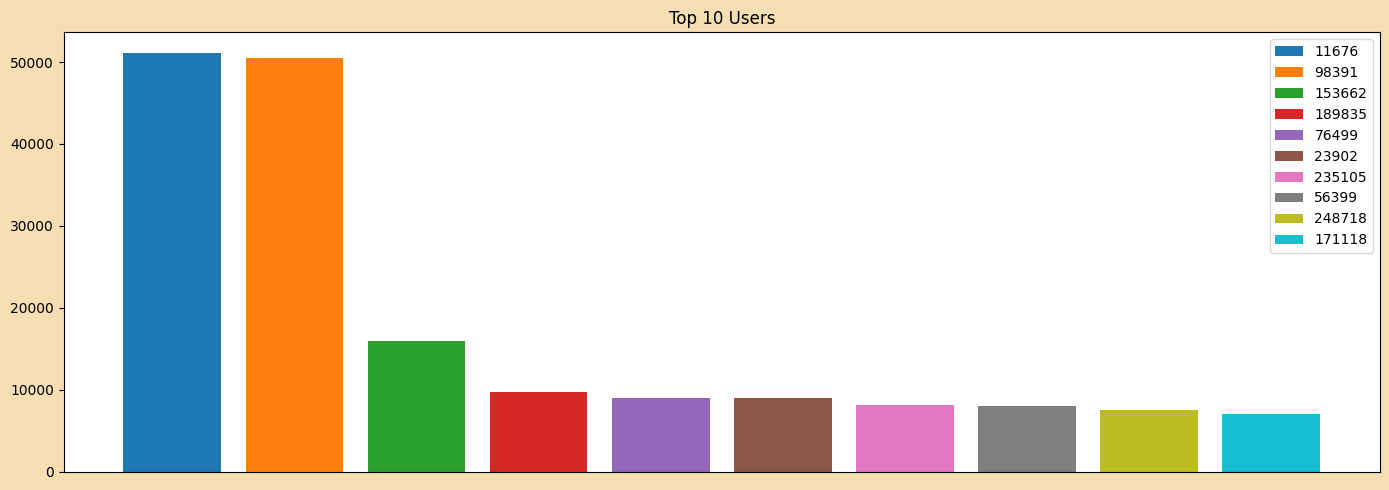

In [140]:
# ploting the top 10 users who done the higher rating on the books
plt.figure(figsize =(14,5), facecolor = 'wheat')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.bar(top_users['User_ID'],top_users['Book_Rating'], label = top_users['User_ID'] ,color = colors)
plt.xticks([])
plt.title('Top 10 Users')
plt.tight_layout()
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to visualize the top 10 users who done the most rating to the books that's why i pick the specific chart.

##### 2. What is/are the insight(s) found from the chart?

From the above ploted chart i got to know the users who done the most rating to the books. following are the top 10 users who rated most to the books.

**Top users who done most ranting on the books :**

* 11676
* 98391
* 153662
* 189835
* 76499
* 23902
* 235105
* 56399
* 248718
* 171118


#### Chart 6 - Books Average Rating.

In [141]:
# calculating the books who has average rating 10
mean_df = pd.DataFrame(df.groupby('Book_Title')['Book_Rating'].mean()).sort_values('Book_Rating', ascending = False)
mean_df = mean_df[mean_df['Book_Rating'] >= 5]
mean_df.reset_index(inplace = True)

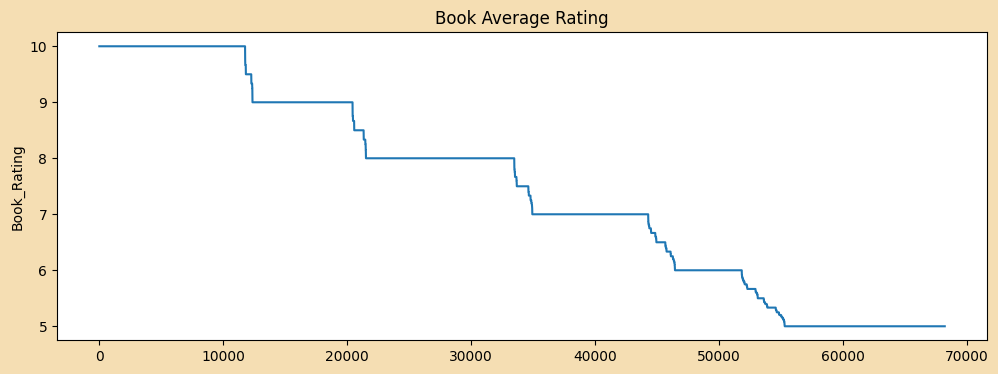

In [142]:
# ploting the lineplot to check the average rating for the books
plt.figure(figsize = (12,4), facecolor = 'wheat')
sns.lineplot(mean_df['Book_Rating'])
plt.title("Book Average Rating")
plt.plot()
plt.show()

In [143]:
# printing the books who has highest average booking rating
mean_df.head()

,Book_Title,Book_Rating
0,Film Is: The International Free Cinema,10.0
1,More Secrets of Happy Children: Embrace Your P...,10.0
2,Jo's Boys : From the Original Publisher,10.0
3,The Vanished Priestess : An Annie Szabo Mystery,10.0
4,Game and Hunting,10.0


In [144]:
mean_df.tail()

,Book_Title,Book_Rating
68212,Richard Scarry's Trains (Golden Little Look-Lo...,5.0
68213,"Richard Simmons' Never Give Up: Inspirations, ...",5.0
68214,Choppers (Choppers),5.0
68215,Richer than all his tribe,5.0
68216,Cat Crafts: More Than 50 Purrrfect Projects,5.0


##### 1. Why did you pick the specific chart?

I wanted to visualize the mean_df Book_Rating column to check the average of books in visualization form that's why i choosed above specific chart.

##### 2. What is/are the insight(s) found from the chart?

From the above ploted lineplot i get to know in which range of average rating store in mean_df dataset.  and from the above lineplot we can say that from range 5 to 10 average rating books data has been stored in mean dataset.

#### Chart  7 - Year Distribution

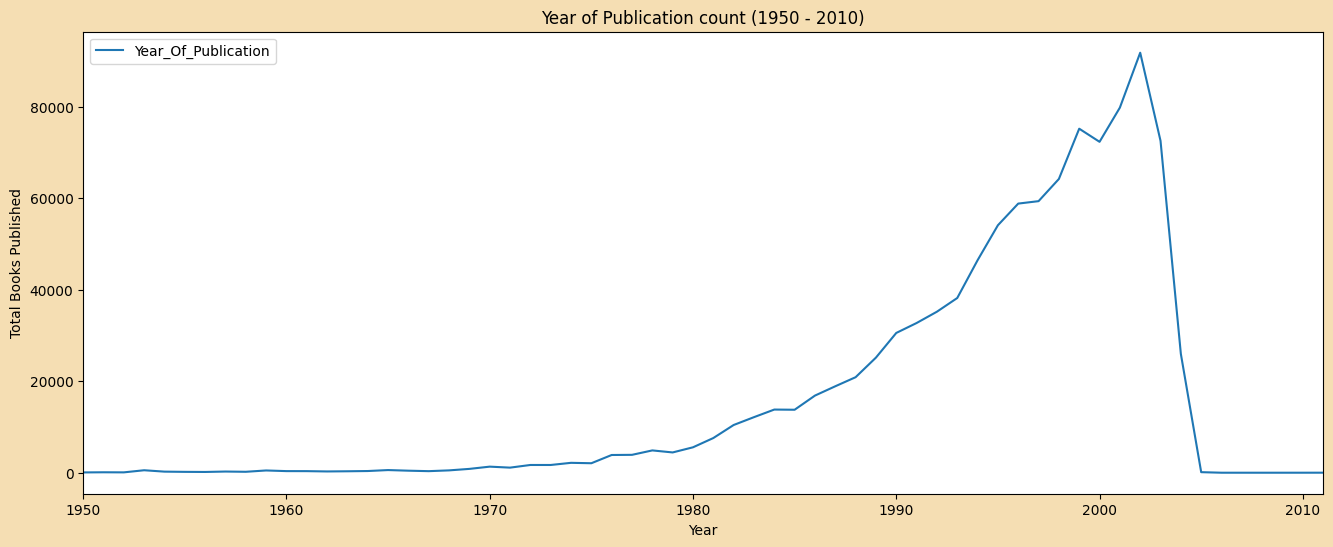

In [145]:
# ploting year distribution
year_count=df['Year_Of_Publication'].value_counts()
year_count=pd.DataFrame(year_count)
plt.figure(figsize=(16, 6), facecolor ='wheat')
sns.lineplot(data=year_count)
plt.title('Year of Publication count (1950 - 2010)')
plt.xlim(1950, 2011)
plt.xlabel('Year')
plt.ylabel('Total Books Published')
plt.show()

##### 1. Why did you pick the specific chart?

I pick the line plot to represent the distribution of the "year" column is based on its ability to effectively showcase trends, changes over time, and comparisons between different years, all while maintaining simplicity and clarity in visualization.



##### 2. What is/are the insight(s) found from the chart?

I fond the insights from the above ploted line plot that are the years between 2000 and 2005 has high count in this dataset.

#### Chart 8 - Book Rating

In [146]:
# defining the fucntion for ploting the Book rating with countplot and Piechart
def cat_summary_with_graph(dataframe, col_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    fig.add_trace(go.Bar(y=dataframe[col_name].value_counts().values.tolist(),
                         x=[str(i) for i in dataframe[col_name].value_counts().index],
                         text=dataframe[col_name].value_counts().values.tolist(),
                         textfont=dict(size=15),
                         name=col_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=colors,
                                     line=dict(color='#DBE6EC',
                                               width=1))),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=dataframe[col_name].value_counts().keys(),
                         values=dataframe[col_name].value_counts().values,
                         textfont=dict(size=10),
                         textposition='auto',
                         showlegend=False,
                         name=col_name,
                         marker=dict(colors=colors)),
                  row=1, col=2)

    fig.update_layout(title={'text': col_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)

In [147]:
# ploting the Book Rating with coutplot and piechart
cat_summary_with_graph(df, 'Book_Rating')

##### 1. Why did you pick the specific chart?

I wanted to plot the rating in percentage form with countplot and piechart that's why choose both of the chart for visualization.

##### 2. What is/are the insight(s) found from the chart?

From the above ploted graph i got the Book rating in percentage form with countplot.

#### Chart  9 - Top 10 Country

In [148]:
# calculating top 10 countries with higher book rating
top_country = pd.DataFrame(df.groupby('Country')['Book_Rating'].sum()).sort_values('Book_Rating', ascending = False).head(11)
top_country.reset_index(inplace = True)
top_10_country = top_country[top_country['Country'] != ""]
top_10_country

,Country,Book_Rating
0,usa,2015002
1,canada,267244
2,united kingdom,113514
3,germany,90126
5,spain,52520
6,australia,52146
7,france,35215
8,portugal,26829
9,malaysia,15969
10,switzerland,14162


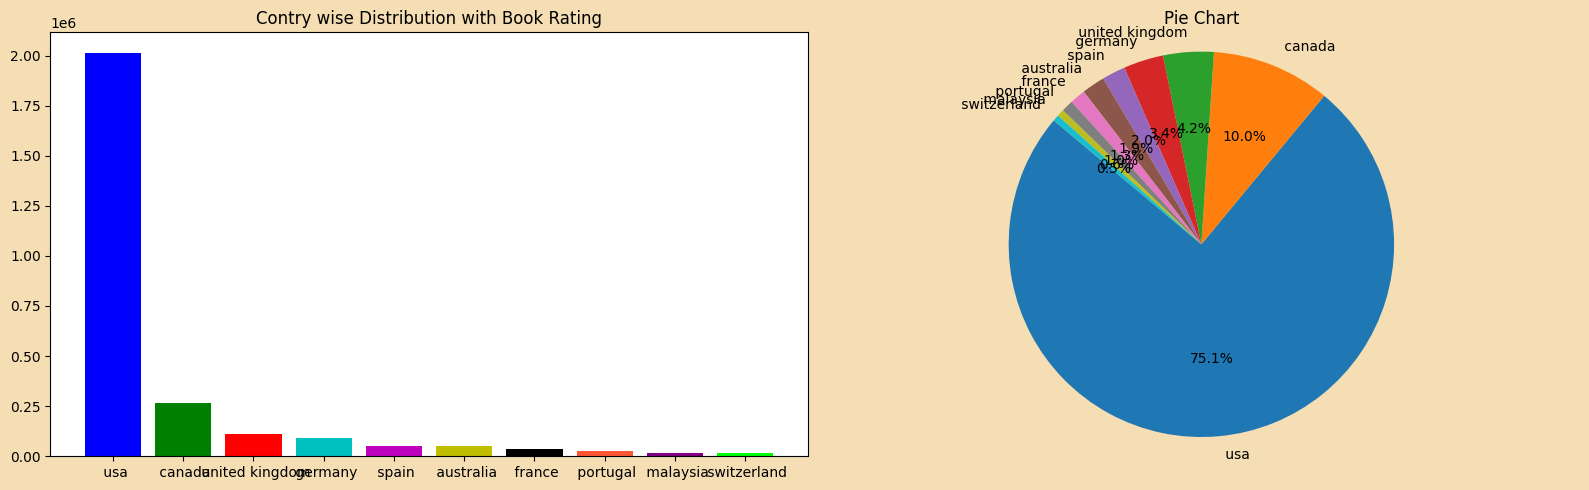

In [149]:
# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5), facecolor ='wheat')
color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FF5733', '#800080', '#00FF00']

# Plot the bar graph on the left subplot (ax1)
ax1.bar(top_10_country['Country'],top_10_country['Book_Rating'], color= color_list)
ax1.set_title('Contry wise Distribution with Book Rating')

# Plot the pie chart on the right subplot (ax2)
ax2.pie(top_10_country['Book_Rating'], labels= top_10_country['Country'], autopct='%1.1f%%', startangle=140)
ax2.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax2.set_title('Pie Chart')
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined subplot
plt.show()

##### 1. Why did you pick the specific chart?


I wanted to see from which country book rating done highest or we can say the top 10 contries with book rating that's why i pick above chart.

##### 2. What is/are the insight(s) found from the chart?

From the above plot i got to know that from which contries how much book rating is done like from the above ploted graph we can conclude that the usa done the highes book rating like this insights i found from the above subplot.

#### Chart  10 - Top 10 rated books by the users

In [150]:
# ploting Top 10 Rated books by user
fig = px.bar(y= top_10['Book_Rating'],
             x= top_10['Book_Title'],
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=round(top_10['Book_Rating'],2),
             title= "Top 10 rated books by the users",
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Book title",
    yaxis_title="average rating",
    font = dict(size=15,family="Franklin Gothic"))
fig.show()


#### Chart  11 - Top 10 book Count in USA

In [151]:
# Top 10 book Count in USA
top_books_by_country = df.groupby(['Country', 'Book_Title']).size().groupby(level=0).nlargest(10).reset_index(level=0, drop=True).reset_index(name='count')
top_books_by_country = top_books_by_country.sort_values('count', ascending = False).head(10)

fig = px.bar(top_books_by_country,
             x='count',
             y='Book_Title',
             color = 'Country',
             orientation='h',
             color_continuous_scale = px.colors.sequential.Viridis,
             title='Top 10 of books with more ratings in USA')

fig.update_layout(height=700, width=1000, yaxis={'categoryorder': 'total ascending'})
fig.show()

##### 1. What is/are the insight(s) found from the chart?

From the above ploted graph i found that which books are top 10 with high count in the USA. from the above ploted graph i conclude that the wild Animus has high count as compare to other books in the USA this kind of insights i found from the above plotted graph.

#### Chart  12 - Top 10 Authors with Most Book

In [152]:
# Top 10 Authors with most book

most_books = df.groupby('Book_Author')['Book_Title'].count().reset_index().sort_values('Book_Title', ascending=False).head(10)

fig = go.Figure(data=[go.Bar(
    x=most_books['Book_Title'],
    y=most_books['Book_Author'],
    orientation='h',
    marker=dict(
        color=most_books['Book_Title'],
        colorscale='viridis',
        line=dict(color='rgba(31, 119, 180, 1.0)', width=1)
    )
)])
fig.update_layout(
    title="Top 10 authors with most books",
    xaxis_title="Total number of books",
    yaxis_title="Authors",
    height=600,
    width=800,
    bargap=0.2,
    bargroupgap=0.1,
    template='plotly_white'
)

fig.show()

##### 1. What is/are the insight(s) found from the chart?

From the above plotted graph i got to know that which author written most books. from the above ploted graph i can conclude that author stephen king has most books as compare to other authors.

#### Chart 13 - Top 10 Publisher

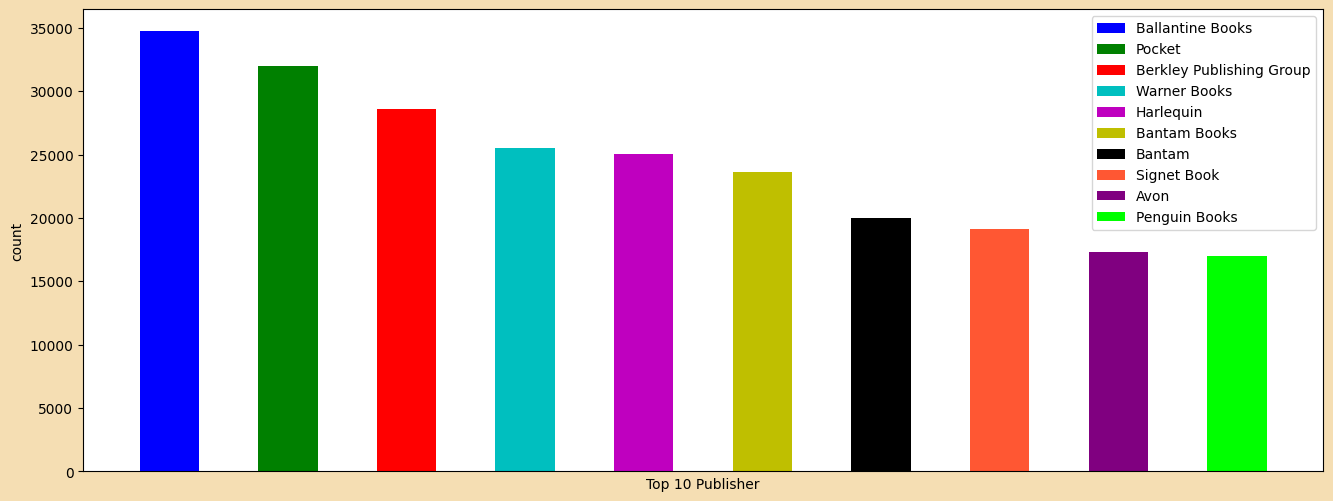

In [153]:
# Ploting top 10 Publisher
plt.figure(figsize = (16,6), facecolor ='wheat')
color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FF5733', '#800080', '#00FF00']
plt.bar(df['Publisher'].value_counts().index[0:10],df['Publisher'].value_counts().values[0:10], width = 0.5, color = color_list, label = df['Publisher'].value_counts().index[0:10] )
plt.xlabel("Top 10 Publisher")
plt.ylabel("count")
plt.legend()
plt.xticks("")
plt.plot()
plt.show()



##### 1. What is/are the insight(s) found from the chart?



I found that the graph showcases the distribution of book publication market share among the top 10 publishers. It's evident that certain publishers have a larger market share compared to others. From the graph we can conclude that the publisher Ballantine Books has published most books as compare to other publisher.

#### Chart - 14 - Correlation Heatmap

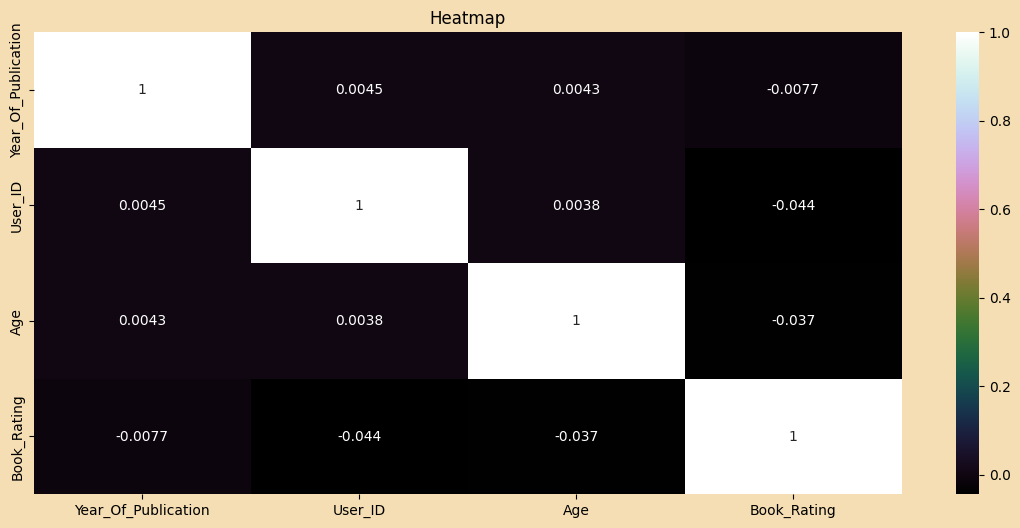

In [154]:
# Correlation Heatmap visualization code
plt.figure(figsize = (14,6), facecolor = 'wheat')
sns.heatmap(df.corr(), annot = True, cmap = 'cubehelix')
plt.title("Heatmap")
plt.plot()
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is an excellent choice for visualizing tabular data where values are represented by colors. It is particularly effective for showcasing patterns, correlations, and relationships within the data that's why i pick the heatmap.

##### 2. What is/are the insight(s) found from the chart?

From the heatmap depicting the relationships between the columns "Year of Publication," "User ID," "Age," and "Book Rating," several insights i found from the heatmap. but from the above ploted heatmap we can conclude that there is no co-relationship between variables in our dataset.

#### Chart - 15 - Pair Plot

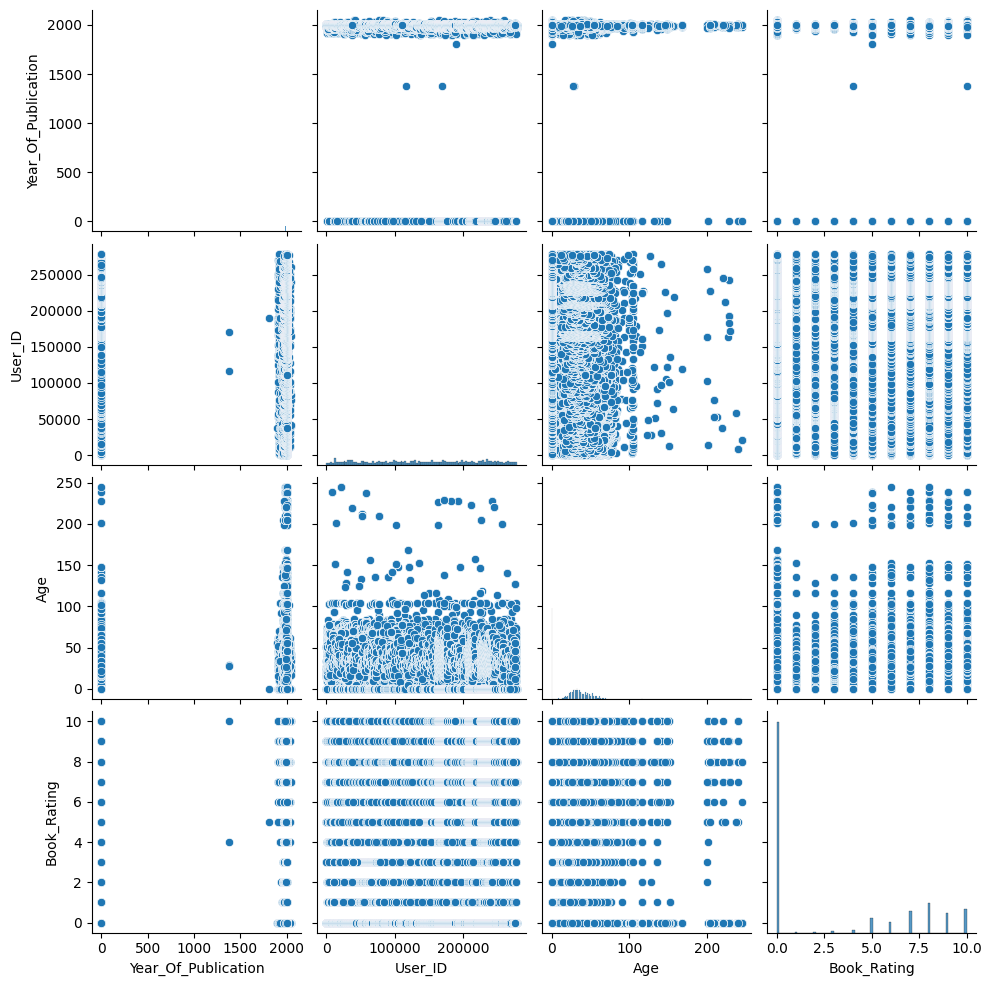

In [155]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

## ***5. Hypothesis Testing***

### Hypothetical Statement  1 - Age and Ratings

In [156]:
# Hypothesis Test 1: Age and Ratings
age_ratings = df[['Age', 'Book_Rating']].dropna()
young_age_ratings = age_ratings[age_ratings['Age'] < 30]['Book_Rating']
old_age_ratings = age_ratings[age_ratings['Age'] >= 30]['Book_Rating']
t_stat, p_value = ttest_ind(young_age_ratings, old_age_ratings, equal_var=False)
print("Hypothesis Test 1 - Age and Ratings:")
print("t-statistic:", t_stat)
print("p-value:", p_value)


Hypothesis Test 1 - Age and Ratings:
t-statistic: 41.96172833136372
p-value: 0.0


*  Null Hypothesis (H0): The age of users does not have a significant impact on their book ratings.
*  Alternative Hypothesis (H1): The age of users does have a significant impact on their book ratings.

we obtained a p-value of 0 for this test. A p-value of 0 indicates that the observed data is extremely unlikely under the null hypothesis. In practical terms, this means that there is strong evidence to reject the null hypothesis, suggesting that the age of users does have a significant impact on their book ratings.

### Hypothetical Statement  2 - Book Year of Publication and Ratings

In [157]:
# Hypothesis Test 2: Book Year of Publication and Ratings
year_ratings = df[['Year_Of_Publication', 'Book_Rating']].dropna()
recent_year_ratings = year_ratings[year_ratings['Year_Of_Publication'] >= 2000]['Book_Rating']
old_year_ratings = year_ratings[year_ratings['Year_Of_Publication'] < 2000]['Book_Rating']
t_stat, p_value = ttest_ind(recent_year_ratings, old_year_ratings, equal_var=False)
print("Hypothesis Test 2 - Year of Publication and Ratings:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

Hypothesis Test 2 - Year of Publication and Ratings:
t-statistic: 45.093930708271785
p-value: 0.0


*  Null Hypothesis (H0): The year of publication of books does not have a *
significant impact on their ratings.
*  Alternative Hypothesis (H1): The year of publication of books does have a significant impact on their ratings.


we obtained a p-value of 0 for this test as well. Similar to the previous case, a p-value of 0 indicates strong evidence against the null hypothesis. Therefore, you have reason to reject the null hypothesis and conclude that the year of publication of books does have a significant impact on their ratings.

### Hypothetical Statement  3 - Book Publisher and Ratings

In [158]:
# Hypothesis Test 3: Book Publisher and Ratings
publisher_ratings = df[['Publisher', 'Book_Rating']].dropna()
top_publishers = ['Ballantine Books','Pocket','Barkley Publishing Group']
top_publisher_ratings = publisher_ratings[publisher_ratings['Publisher'].isin(top_publishers)]['Book_Rating']
other_publisher_ratings = publisher_ratings[~publisher_ratings['Publisher'].isin(top_publishers)]['Book_Rating']
t_stat, p_value = ttest_ind(top_publisher_ratings, other_publisher_ratings, equal_var=False)
print("Hypothesis Test 3 - Publisher and Ratings:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

Hypothesis Test 3 - Publisher and Ratings:
t-statistic: -12.929418855990821
p-value: 3.3674430971200904e-38


* Null Hypothesis (H0): The publisher of books does not have a significant impact on their ratings.
* Alternative Hypothesis (H1): The publisher of books does have a significant impact on their ratings.


For this test, you obtained a p-value of approximately 3.36. Unlike the previous tests, this p-value is not close to 0 or very small. In this case, the p-value indicates that you do not have enough evidence to reject the null hypothesis. This means that you do not have sufficient statistical evidence to conclude that the publisher of books has a significant impact on their ratings.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [159]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Book_ID                    0
Book_Title                 0
Book_Author                1
Year_Of_Publication        0
Publisher                  2
User_ID                    0
Age                        0
Book_Rating                0
Country                11177
dtype: int64

In [160]:
# Droping the country column because we don't need it anymore
df.drop(columns = 'Country', axis = 1, inplace  = True)

In [161]:
df.isnull().sum()

Book_ID                0
Book_Title             0
Book_Author            1
Year_Of_Publication    0
Publisher              2
User_ID                0
Age                    0
Book_Rating            0
dtype: int64

In [162]:
# Replacing the 0 with median in in Age column
df['Age'] = df['Age'].replace(0,np.nan)

# Replacing the null values with most frequent Author
most_frequent_author = df['Book_Author'].mode()[0]
df['Book_Author'] = df['Book_Author'].fillna(most_frequent_author)

# Replacing the null values with most frequent Publisher
most_frequent_publisher = df['Publisher'].mode()[0]
df['Publisher'] = df['Publisher'].fillna(most_frequent_publisher)

# # droping remaining null values in dataset
# df.dropna(inplace =True)

In [163]:
# Replacing null values with median in age column
df['Age'].fillna(df['Age'].median(), inplace = True)

# Replacing null values with mode in Year_of_publication column
df['Year_Of_Publication'].fillna(df['Year_Of_Publication'].mode()[0], inplace = True)

In [164]:
df.isnull().sum()

Book_ID                0
Book_Title             0
Book_Author            0
Year_Of_Publication    0
Publisher              0
User_ID                0
Age                    0
Book_Rating            0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?




*  Replacing Null Values with Mean in Age Column:

Technique Used: Mean imputation
Reason: I chose to replace missing age values with the mean age. This is a common technique when dealing with numerical data, as it preserves the overall distribution and minimizes the impact of outliers. Mean imputation can be a reasonable choice when the missing values are assumed to be missing at random and when the mean is a representative measure of central tendency for the variable.


* Replacing Null Values with Most Frequent Publisher in Publisher Column:

Technique Used: Mode imputation
Reason: I replaced missing publisher values with the most frequent publisher in the dataset. Mode imputation is suitable for categorical data like publishers, where you want to retain the most common category and avoid introducing new levels. This technique is useful when the missing data is not at random and when the most frequent category provides a reasonable estimate for the missing values.


* Replacing Null Values with Most Frequent Author in Book_Author Column:

Technique Used: Mode imputation
Reason: Similarly to the publisher column, you filled missing author values with the most frequent author in the dataset. Mode imputation is appropriate for categorical variables like authors, especially when you want to retain the prevailing category without making strong assumptions about the missing data.

### 2. Handling Outliers

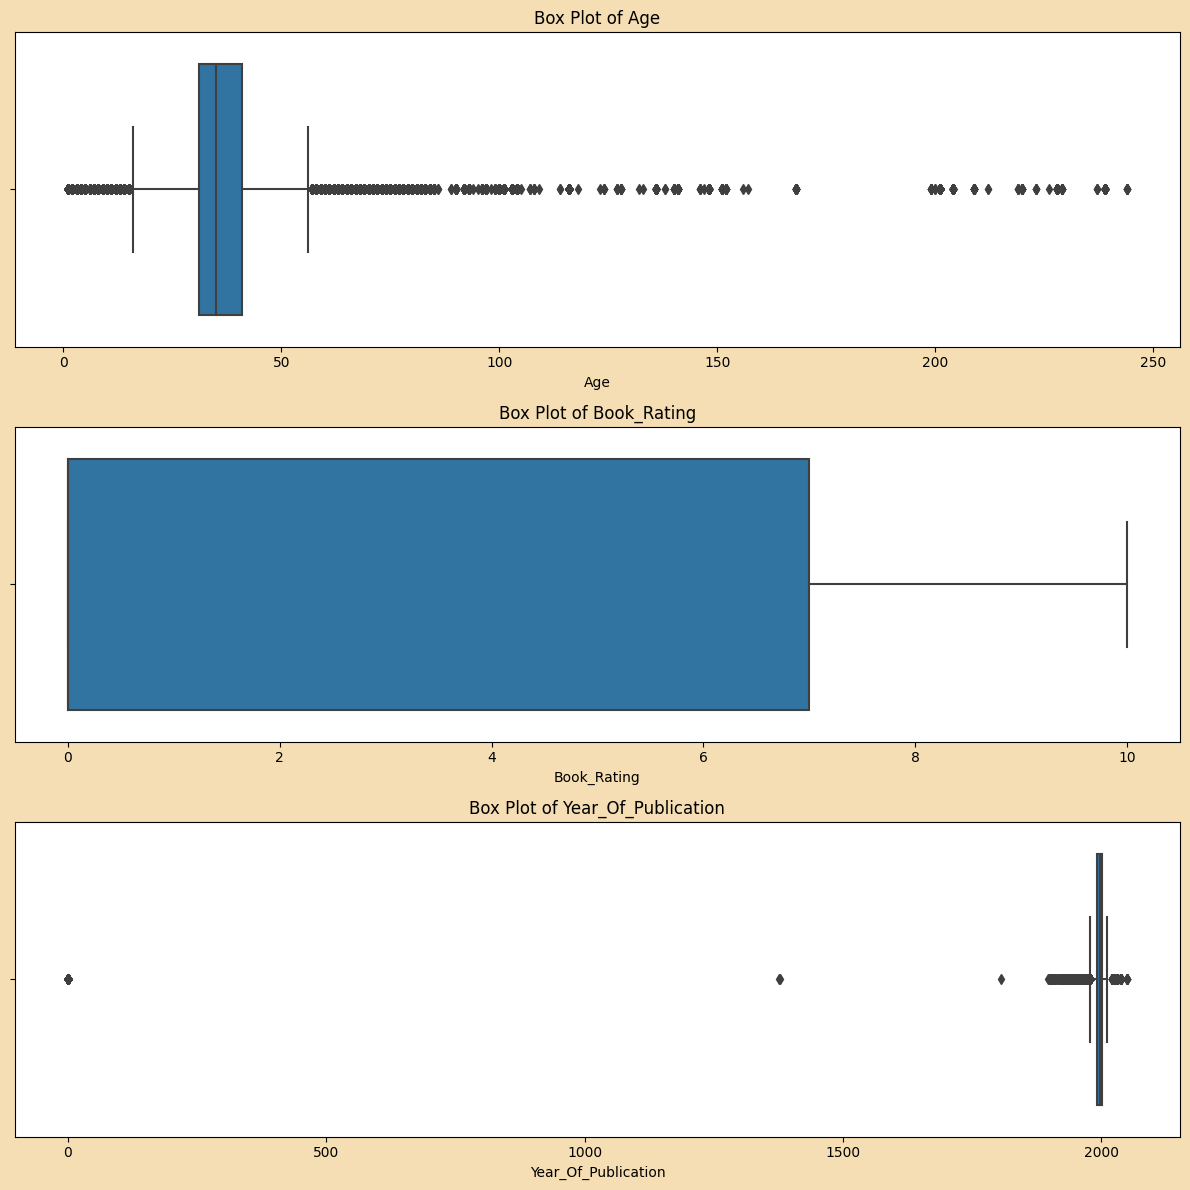

In [165]:
# Ploting Boxplot before handling the outliers

# Numeric columns to visualize
numeric_columns = ['Age', 'Book_Rating', 'Year_Of_Publication']

# Create subplots for each numeric column
plt.figure(figsize=(12, 4 * len(numeric_columns)), facecolor ='wheat')

for i, col in enumerate(numeric_columns, start=1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [166]:
# handling the outliers

for col in numeric_columns:
    # Calculate the IQR (Interquartile Range)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define upper and lower bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with NaN (you can also choose to remove them)
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.nan, df[col])

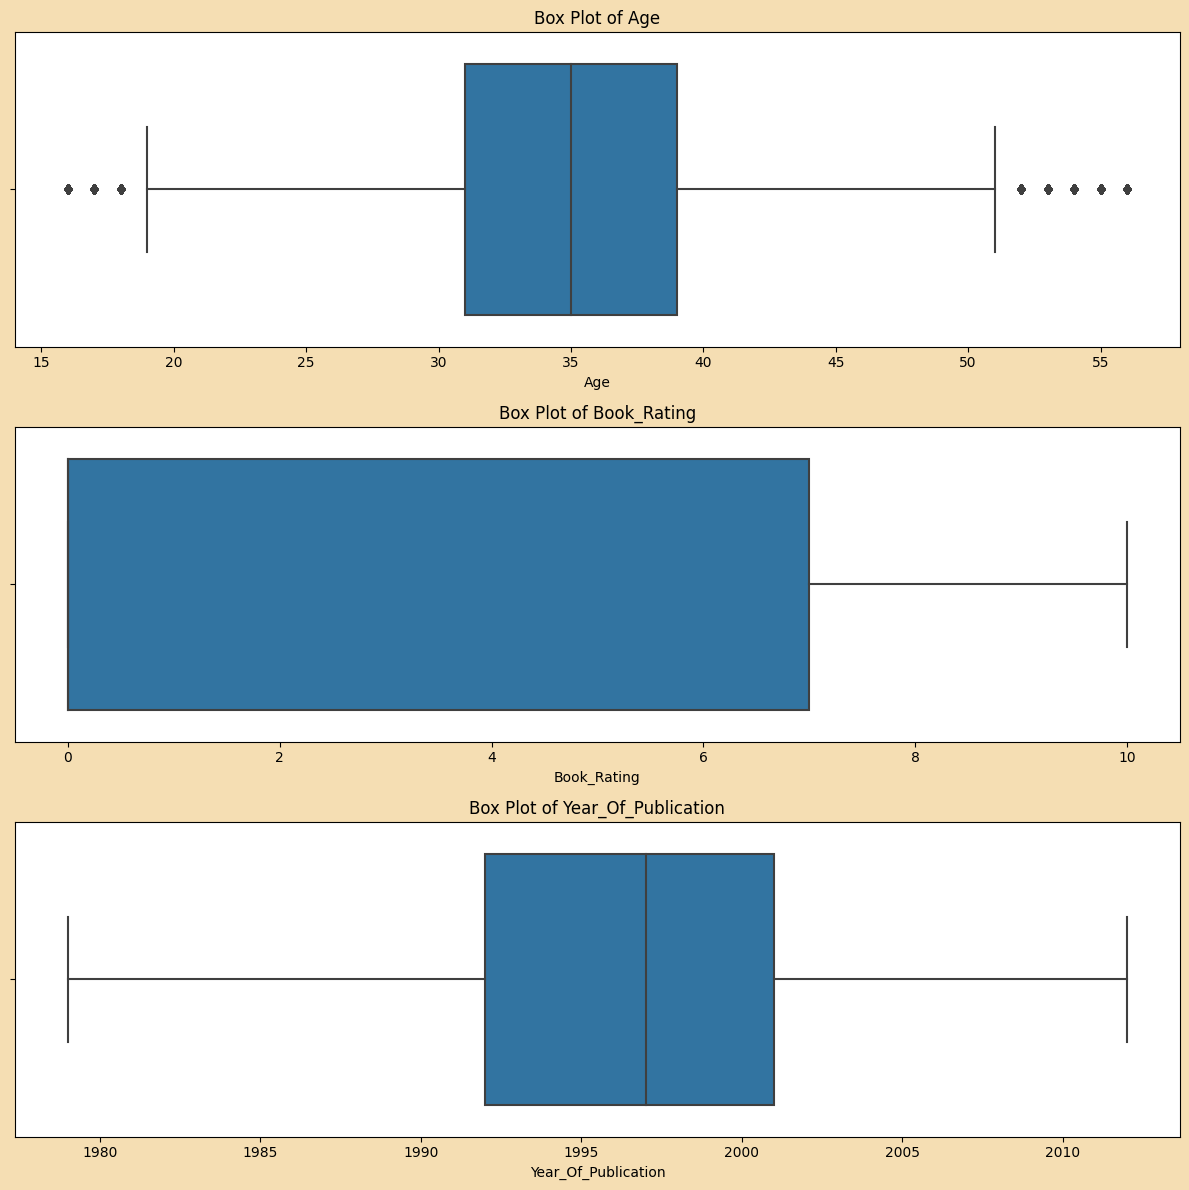

In [167]:
# Printing the box plot after Handling outliers
numeric_columns = ['Age', 'Book_Rating', 'Year_Of_Publication']

# Create subplots for each numeric column
plt.figure(figsize=(12, 4 * len(numeric_columns)), facecolor ='wheat')

for i, col in enumerate(numeric_columns, start=1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?


**Outlier Treatment Techniques Used:**

IQR Method for Numeric Columns (Age, Book-Rating, Year-Of-Publication):
Technique Used: Interquartile Range (IQR) method
Reason: The IQR method is a robust statistical technique that identifies outliers based on the spread of the data. It calculates the range between the first and third quartiles (IQR) and identifies values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. Outliers can distort statistical analyses and modeling, so this method is commonly used to identify and handle extreme values. By using the IQR method, you aim to retain data integrity and minimize the impact of potential outliers on subsequent analyses, while avoiding the complete removal of data points.



In [168]:
df.isnull().sum()

Book_ID                    0
Book_Title                 0
Book_Author                0
Year_Of_Publication    44268
Publisher                  0
User_ID                    0
Age                    71349
Book_Rating                0
dtype: int64

In [169]:
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Year_Of_Publication'].fillna(df['Year_Of_Publication'].mode()[0], inplace = True)

In [170]:
df.isnull().sum()

Book_ID                0
Book_Title             0
Book_Author            0
Year_Of_Publication    0
Publisher              0
User_ID                0
Age                    0
Book_Rating            0
dtype: int64

### 3. Categorical Encoding

In [171]:
# Select categorical columns for label encoding
categorical_columns = ['Publisher', 'Book_Author']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to selected columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [172]:
df.head()

,Book_ID,Book_Title,Book_Author,Year_Of_Publication,Publisher,User_ID,Age,Book_Rating
0,0195153448,Classical Mythology,64911,2002.0,10924,2,18.0,0.0
1,0002005018,Clara Callan,81125,2001.0,6640,8,35.0,5.0
2,0002005018,Clara Callan,81125,2001.0,6640,11400,49.0,0.0
3,0002005018,Clara Callan,81125,2001.0,6640,11676,35.0,8.0
4,0002005018,Clara Callan,81125,2001.0,6640,41385,35.0,0.0


#### What all categorical encoding techniques have you used & why did you use those techniques?

**Categorical Encoding Technique Used:**

Label Encoding for 'Publisher' and 'Book-Author' Columns:
Technique Used: Label encoding
Reason: Label encoding is chosen for its simplicity and memory efficiency. Label encoding assigns a unique integer label to each category in the specified columns ('Publisher' and 'Book-Author'). This technique is suitable when there is an inherent ordinal relationship or ranking among the categories. However, it's important to note that label encoding may not be appropriate for categorical variables without a natural order, as it might introduce unintended ordinal relationships. In this case, you've used label encoding assuming that there might be some ordinality or rank associated with publishers and authors, which could potentially capture relevant patterns for your book recommendation system. Additionally, label encoding can be memory-efficient, making it a suitable choice when dealing with larger datasets or systems with memory constraints.

## ***7. ML Model Implementation***

### ML Model  1 - K-Means Clustering

In [173]:
# Select features for clustering
features = df[['Publisher', 'Book_Author', 'Age', 'Year_Of_Publication']]

# Apply K-Means clustering
num_clusters = 10  # Number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(features)

In [174]:
# Define a function to recommend books within the same cluster
def recommend_same_cluster(target_book_id, cluster_column):
  target_cluster = df.loc[df['Book_ID'] == str(target_book_id), str(cluster_column)].values[0]
  recommended_books = pd.DataFrame(df[df['Cluster'] == target_cluster].groupby('Book_Title')['Book_Rating'].sum()).sort_values(by = 'Book_Rating', ascending = False).head(10).reset_index()['Book_Title'].values
  return recommended_books

In [175]:
# printing the 10 Recommended books within the same cluster for given book id
recommend_same_cluster('0002005018','Cluster')

array(['Wild Animus', 'Divine Secrets of the Ya-Ya Sisterhood: A Novel',
       'Fahrenheit 451', 'Empire Falls',
       'Little Altars Everywhere: A Novel',
       'The Bridges of Madison County',
       'The Divine Secrets of the Ya-Ya Sisterhood: A Novel',
       'Watership Down',
       'The Alchemist: A Fable About Following Your Dream',
       'The Hot Zone'], dtype=object)

In [176]:
# testing the function with another book id
recommend_same_cluster('0195153448','Cluster')

array(['The Notebook', 'The Five People You Meet in Heaven',
       "The Girls' Guide to Hunting and Fishing", 'Jurassic Park',
       'Message in a Bottle', 'The Horse Whisperer',
       "Ender's Game (Ender Wiggins Saga (Paperback))",
       'The Golden Compass (His Dark Materials, Book 1)',
       'A Walk to Remember',
       'Stupid White Men ...and Other Sorry Excuses for the State of the Nation!'],
      dtype=object)

In [177]:
# Define a function to recommend popular books within a cluster
def recommend_popular_books(target_cluster, popularity_threshold, top_n=10):
    cluster_data = df[df['Cluster'] == target_cluster]
    popular_books = cluster_data[cluster_data['Book_Rating'] >= popularity_threshold]
    popular_books = popular_books['Book_Title'].value_counts().index
    recommended_books = popular_books[0:top_n]
    return recommended_books

In [178]:
# testing recommend_popular_books function with 0 ,8 , 10 parameter
recommend_popular_books(0,8,10)

Index(['Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson',
       'Timeline', 'Seabiscuit: An American Legend', 'The Handmaid's Tale',
       'The Giver (21st Century Reference)', 'A Wrinkle in Time',
       'A Wrinkle In Time', 'Sphere', 'The Pillars of the Earth',
       'The Mists of Avalon'],
      dtype='object')

In [179]:
# testing recommend_popular_books funtion with different parameters
recommend_popular_books(3,5,5)

Index(['The Nanny Diaries: A Novel', 'Bridget Jones's Diary',
       'To Kill a Mockingbird',
       'Fast Food Nation: The Dark Side of the All-American Meal',
       'Wicked: The Life and Times of the Wicked Witch of the West'],
      dtype='object')

In [180]:
# Define a function to recommend books based on collaborative filtering within a cluster
def recommend_collaborative_filtering(target_user, target_cluster, cluster_column):
    cluster_users = df[df[cluster_column] == target_cluster]['User_ID'].values
    similar_users = cluster_users[cluster_users != target_user]
    p_df = df[df['User_ID'].isin(similar_users)]
    p_df = p_df[p_df['Book_Rating']>= 5]
    recommended_books = p_df['Book_Title'].value_counts()[0:9].index
    return recommended_books

In [181]:
# Testing recommend_collaborative_filtering function with 198711,0,'Cluster' parameter
recommend_collaborative_filtering(198711,0,'Cluster')

Index(['The Lovely Bones: A Novel', 'The Da Vinci Code',
       'The Secret Life of Bees',
       'Harry Potter and the Chamber of Secrets (Book 2)',
       'Bridget Jones's Diary', 'The Nanny Diaries: A Novel',
       'The Red Tent (Bestselling Backlist)', 'Life of Pi', 'Timeline'],
      dtype='object')

In [182]:
# Testing recommend_collaborative_filtering function with different parameter
recommend_collaborative_filtering(10924,4,'Cluster')

Index(['The Lovely Bones: A Novel',
       'Divine Secrets of the Ya-Ya Sisterhood: A Novel', 'The Da Vinci Code',
       'Wild Animus', 'Bridget Jones's Diary', 'The Secret Life of Bees',
       'Harry Potter and the Chamber of Secrets (Book 2)', 'Life of Pi',
       'The Nanny Diaries: A Novel'],
      dtype='object')

In [183]:
recommend_collaborative_filtering(11400,0,'Cluster')

Index(['The Lovely Bones: A Novel', 'The Da Vinci Code',
       'The Secret Life of Bees',
       'Harry Potter and the Chamber of Secrets (Book 2)',
       'Bridget Jones's Diary', 'The Nanny Diaries: A Novel',
       'The Red Tent (Bestselling Backlist)', 'Life of Pi', 'Timeline'],
      dtype='object')



























#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

K-Means Clustering: I have applied the K-Means clustering algorithm to group books into clusters based on their features (Publisher, Book-Author, Year-Of-Publication). Clustering is a technique used to group similar items together, which can be useful for segmenting books into different categories or themes.

Techniques for Book Recommendation:

Same Cluster Recommendation: You have implemented a recommendation technique that suggests books within the same cluster as the target book. This leverages the K-Means clustering to find books that are similar in terms of their features.

Popular Books Recommendation: You have implemented a technique that recommends popular books within a cluster based on a popularity threshold. This is a simple popularity-based recommendation approach, where books with higher ratings are considered more popular within a cluster.

Collaborative Filtering Recommendation: You have implemented a collaborative filtering technique that recommends books based on similar users' preferences within the same cluster. This approach identifies users in the same cluster as the target user and recommends books that those users have liked.

Overall, I've combined K-Means clustering with different recommendation techniques to create a book recommendation system that takes advantage of both book features and user preferences within clusters. This hybrid approach aims to provide diverse and relevant recommendations to users.

### ML Model 2 - MiniBatchKMeans

In [184]:
# converting int datatype into str for Book_Author column
df['Book_Author'] = df['Book_Author'].astype(str)

In [185]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Book_Title'] + ' ' + df['Book_Author'])

# Dimensionality reduction with TruncatedSVD
num_components = 100  # You can adjust this based on your memory constraints
svd = TruncatedSVD(n_components=num_components, random_state=42)
reduced_matrix = svd.fit_transform(tfidf_matrix)

# Apply MiniBatchKMeans
num_clusters = 5  # You can adjust this based on your needs
kmeans = MiniBatchKMeans(n_clusters=num_clusters, batch_size=100, random_state=42)
cluster_labels = kmeans.fit_predict(reduced_matrix)

# Assign cluster labels to your dataset
df['Cluster'] = cluster_labels

# Print cluster distribution
print(df['Cluster'].value_counts())

0    933544
4     62604
3     14282
2     12874
1      7832
Name: Cluster, dtype: int64


In [186]:
# Recommendation Logic 1: Popular Books from the Same Cluster
def popular_books_same_cluster(book_title):
    cluster = df[df['Book_Title'] == book_title]['Cluster'].values[0]
    recommended_books = df[(df['Cluster'] == cluster) & (df['Book_Title'] != book_title)]
    recommended_books = list(pd.DataFrame(recommended_books.sort_values(by = 'Book_Rating', ascending =False).groupby('Book_Title')['Book_Rating'].sum()).reset_index().sort_values(by = 'Book_Rating',ascending = False).head(15)['Book_Title'].values)
    return recommended_books

In [187]:
# printing recommended books
popular_books_same_cluster('My Story')

["She's Come Undone (Oprah's Book Club)",
 "She's Come Undone (Oprah's Book Club (Paperback))",
 'The Perfect Storm : A True Story of Men Against the Sea',
 'I Know This Much Is True',
 'Midnight in the Garden of Good and Evil: A Savannah Story',
 "The Princess Bride: S Morgenstern's Classic Tale of True Love and High Adventure",
 'One True Thing',
 "I Know This Much Is True (Oprah's Book Club)",
 'Catch Me If You Can: The True Story of a Real Fake',
 'A Man Named Dave: A Story of Triumph and Forgiveness',
 'Gap Creek: The Story Of A Marriage',
 'The Neverending Story',
 'Under the Banner of Heaven : A Story of Violent Faith',
 'The Pact: A Love Story',
 'Every Breath You Take : A True Story of Obsession, Revenge, and Murder']

In [188]:
# Recommendation Logic 2: Similar Books from the Same Cluster
def similar_books_same_cluster(book_title):
    cluster = df[df['Book_Title'] == book_title]['Cluster'].values[0]
    similar_books_indices = kmeans.labels_ == cluster
    similar_books = df[similar_books_indices][['Book_Title', 'Book_Author', 'Book_Rating']]
    similar_books = similar_books.sort_values(by='Book_Rating', ascending=False)
    return similar_books

In [189]:
# printing recommended books
similar_books_same_cluster('My Story')

,Book_Title,Book_Author,Book_Rating
794877,SHE'S COME UNDONE (Oprah's Book Club (Hardcover)),98609,10.0
971168,Story of the Civil War Coloring Book,76959,10.0
135558,DIANA HER TRUE STORY COMMEMORATIVE EDITION,3859,10.0
717118,Anonymous Rex: A Detective Story,28269,10.0
28527,She's Come Undone (Oprah's Book Club),98609,10.0
...,...,...,...
354211,Story of My Life,37342,0.0
354212,Story of My Life,37342,0.0
354214,Story of My Life,37342,0.0
355501,The Story of a Million Years,20364,0.0


In [190]:
# Recommendation Logic 3: Diverse Recommendations from Different Clusters
def diverse_recommendations():
    recommended_books = pd.DataFrame(columns=['Book_Title', 'Book_Author', 'Book_Rating'])
    for cluster in range(num_clusters):
        cluster_books = df[df['Cluster'] == cluster]
        highest_rated_book = cluster_books.sort_values(by='Book_Rating', ascending=False).iloc[0]
        recommended_books = recommended_books.append(highest_rated_book)
    return recommended_books

In [191]:
# printing Diverse Recommendations from Different Clusters
diverse_recommendations()

,Book_Title,Book_Author,Book_Rating,Book_ID,Year_Of_Publication,Publisher,User_ID,Age,Cluster
337248,Season of the Machete,42799,10.0,0446600474,1995.0,15861.0,89507.0,30.0,0.0
677782,"The Rift (Star Trek, Book 57)",76989,10.0,0671747967,1991.0,14072.0,57006.0,30.0,1.0
92868,Eyes of the Dragon,90803,10.0,0451151259,1988.0,11373.0,98904.0,28.0,2.0
794877,SHE'S COME UNDONE (Oprah's Book Club (Hardcover)),98609,10.0,0671014730,1997.0,1129.0,150498.0,38.0,3.0
24828,The Lovely Bones: A Novel,2488,10.0,0316666343,2002.0,8800.0,141010.0,35.0,4.0


Above we've employed the MiniBatchKMeans clustering algorithm as the underlying machine learning model. This algorithm efficiently clusters books based on their features, allowing us to group similar books together and identify meaningful patterns. The MiniBatchKMeans algorithm was chosen due to its memory-efficient nature, making it well-suited for large datasets even with limited computational resources.

Furthermore, we've implemented three distinct recommendation logics to provide users with a range of personalized suggestions:

1. Popular Books from the Same Cluster:
This recommendation logic focuses on suggesting popular books that share the same cluster as the user's input. When users provide a book title they enjoyed, our system identifies the cluster to which that book belongs. It then recommends other popular books from the same cluster. This logic is tailored to users who prefer recommendations aligned with their interests.

2. Similar Books from the Same Cluster:
Our second recommendation logic is designed to identify books similar to the user's chosen book within the same cluster. By inputting a book title, users prompt the system to locate the cluster and suggest books within that cluster that share similarities in content, style, or genre. This logic caters to users seeking recommendations that closely match their specific preferences.

3. Diverse Recommendations from Different Clusters:
The third logic offers a diverse set of book suggestions by selecting the highest-rated book from each cluster. This approach ensures that users receive a well-rounded array of recommendations spanning various genres and themes. By introducing users to a range of options, we aim to enhance their reading experiences and encourage exploration.

### ML Model 3 - DBSCAN (Density-Based Spatial Clustering of Applications with Noise)



1.  For a given book, recommend other books from the same cluster. This assumes that books within the same cluster are similar in some way and that users who liked one book might enjoy other books in the same cluster.

In [214]:
# making dataset for our algorithm
data = df[['Book_Author', 'Publisher','Year_Of_Publication']]

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster'] = dbscan.fit_predict(data)

In [257]:
# defining function for cluster based recommendation using DBSCAN cluster
def cluster_based_recommendation(book_id):
    cluster = df.loc[df['Book_ID'] == book_id, 'Cluster'].values[0]
    recommended_books = pd.DataFrame(df[df['Cluster'] == cluster].groupby('Book_Title')['Book_Rating'].sum()).reset_index().sort_values(by = 'Book_Rating',ascending =False).head(10)['Book_Title'].values
    recommended_books = pd.DataFrame({'Recommended Books':recommended_books })
    return recommended_books

In [259]:
# Printing Recommended Books for related to this book 0192126040
cluster_based_recommendation('0192126040')

,Recommended Books
0,Selected Poems
1,Little Women
2,Adventures of Huckleberry Finn
3,Dracula
4,The Velveteen Rabbit
5,Emma
6,The Secret Garden
7,Jane Eyre
8,The Wizard of Oz
9,Psychology


In [269]:
# Recommended Books for within different cluster
cluster_based_recommendation('1558746218')

,Recommended Books
0,Chicken Soup for the Pet Lover's Soul (Chicken...
1,A Second Chicken Soup for the Woman's Soul (Ch...
2,A 5th Portion of Chicken Soup for the Soul : 1...
3,Chicken Soup for the Pet Lover's Soul (Chicken...
4,Chicken Soup for the Country Soul: Stories Ser...
5,Chicken Soup for the Teenage Soul Journal (Chi...
6,Sopa de pollo para el alma de la madre: relato...


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [192]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [193]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [194]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [195]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***